Elaina Manalac & Jacob Manzella: 
Optimizing Grocery Store Marketing Campaigns

Contributions: 
Elaina: initial data cleaning and exploratory analysis, correlation matrices, all seaborn visualizations
Jacob: regressions and regression plot

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [78]:
data = pd.read_csv('project_data.csv')
data.head()

,id,birth_year,education,marital_status,income,kid_home,teen_home,customer_enrollment,recency,wine,...,catalog_purchases,store_purchases,website_visits,accepted_3,accepted_4,accepted_5,accepted_1,accepted_2,complain,response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/12,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/14,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/13,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/14,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/14,94,173,...,3,6,5,0,0,0,0,0,0,0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2240 non-null   int64  
 1   birth_year           2240 non-null   int64  
 2   education            2240 non-null   object 
 3   marital_status       2240 non-null   object 
 4   income               2216 non-null   float64
 5   kid_home             2240 non-null   int64  
 6   teen_home            2240 non-null   int64  
 7   customer_enrollment  2240 non-null   object 
 8   recency              2240 non-null   int64  
 9   wine                 2240 non-null   int64  
 10  fruits               2240 non-null   int64  
 11  meat                 2240 non-null   int64  
 12  fish                 2240 non-null   int64  
 13  sweet                2240 non-null   int64  
 14  gold                 2240 non-null   int64  
 15  discount_purchase    2240 non-null   i

In [10]:
print("Rows:", data.shape[0])    
print("Columns:", data.shape[1])

Rows: 2240
Columns: 27


In [11]:
print("Column names:", data.columns)

Column names: Index(['id', 'birth_year', 'education', 'marital_status', 'income', 'kid_home',
       'teen_home', 'customer_enrollment', 'recency', 'wine', 'fruits', 'meat',
       'fish', 'sweet ', 'gold', 'discount_purchase', 'website_purchases',
       'catalog_purchases', 'store_purchases', 'website_visits', 'accepted_3',
       'accepted_4', 'accepted_5', 'accepted_1', 'accepted_2', 'complain',
       'response'],
      dtype='object')


In [12]:
print("\nSummary statistics of the dataframe:")
data.describe()


Summary statistics of the dataframe:


,id,birth_year,income,kid_home,teen_home,recency,wine,fruits,meat,fish,...,catalog_purchases,store_purchases,website_visits,accepted_3,accepted_4,accepted_5,accepted_1,accepted_2,complain,response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
#correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()
print(corr_matrix)

                         id  birth_year    income  kid_home  teen_home  \
id                 1.000000    0.000028  0.013095  0.002406  -0.002580   
birth_year         0.000028    1.000000 -0.161791  0.230176  -0.352111   
income             0.013095   -0.161791  1.000000 -0.428669   0.019133   
kid_home           0.002406    0.230176 -0.428669  1.000000  -0.036133   
teen_home         -0.002580   -0.352111  0.019133 -0.036133   1.000000   
recency           -0.046524   -0.019871 -0.003970  0.008827   0.016198   
wine              -0.022878   -0.157773  0.578650 -0.496297   0.004846   
fruits             0.004600   -0.017917  0.430842 -0.372581  -0.176764   
meat              -0.004437   -0.030872  0.584633 -0.437129  -0.261160   
fish              -0.024475   -0.041625  0.438871 -0.387644  -0.204187   
sweet             -0.007642   -0.018133  0.440744 -0.370673  -0.162475   
gold              -0.013438   -0.061818  0.325916 -0.349595  -0.021725   
discount_purchase -0.037166   -0.06084

In [7]:
# Top 10 relationships correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']]
corr_pairs['Pair'] = corr_pairs.apply(lambda x: tuple(sorted([x['Variable 1'], x['Variable 2']])), axis=1)
unique_pairs = corr_pairs.drop_duplicates(subset='Pair').drop(columns='Pair')
top_positive = unique_pairs.sort_values(by='Correlation', ascending=False).head(10)
top_negative = unique_pairs.sort_values(by='Correlation').head(10)
print("Top 10 Strongest Positive Relationships:")
print(top_positive)
print("\nTop 10 Strongest Negative Relationships:")
print(top_negative)



Top 10 Strongest Positive Relationships:
    Variable 1         Variable 2  Correlation
206       meat  catalog_purchases     0.723827
159       wine    store_purchases     0.642100
158       wine  catalog_purchases     0.635226
177     fruits               fish     0.594804
62      income  catalog_purchases     0.589162
56      income               meat     0.584633
226       fish             sweet      0.579870
54      income               wine     0.578650
201       meat               fish     0.568402
178     fruits             sweet      0.567164

Top 10 Strongest Negative Relationships:
            Variable 1         Variable 2  Correlation
64              income     website_visits    -0.553088
208               meat     website_visits    -0.539470
352  catalog_purchases     website_visits    -0.520364
86            kid_home  catalog_purchases    -0.502237
87            kid_home    store_purchases    -0.499683
78            kid_home               wine    -0.496297
232            

In [7]:
#Null values
missing_values = data.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
id                      0
birth_year              0
education               0
marital_status          0
income                 24
kid_home                0
teen_home               0
customer_enrollment     0
recency                 0
wine                    0
fruits                  0
meat                    0
fish                    0
sweet                   0
gold                    0
discount_purchase       0
website_purchases       0
catalog_purchases       0
store_purchases         0
website_visits          0
accepted_3              0
accepted_4              0
accepted_5              0
accepted_1              0
accepted_2              0
complain                0
response                0
dtype: int64


In [10]:
from tabulate import tabulate

# Visually appealing correlation matrix 
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']]
corr_pairs['Pair'] = corr_pairs.apply(lambda x: tuple(sorted([x['Variable 1'], x['Variable 2']])), axis=1)
unique_pairs = corr_pairs.drop_duplicates(subset='Pair').drop(columns='Pair')
top_positive = unique_pairs.sort_values(by='Correlation', ascending=False).head(10)
top_negative = unique_pairs.sort_values(by='Correlation').head(10)
print("Top 10 Strongest Positive Relationships:")
print(tabulate(top_positive, headers='keys', tablefmt='pretty', showindex=False))
print("\nTop 10 Strongest Negative Relationships:")
print(tabulate(top_negative, headers='keys', tablefmt='pretty', showindex=False))


Top 10 Strongest Positive Relationships:
+------------+-------------------+--------------------+
| Variable 1 |    Variable 2     |    Correlation     |
+------------+-------------------+--------------------+
|    meat    | catalog_purchases | 0.7238265908738766 |
|    wine    |  store_purchases  | 0.6421004382014517 |
|    wine    | catalog_purchases | 0.6352257380760022 |
|   fruits   |       fish        | 0.5948035099014977 |
|   income   | catalog_purchases | 0.5891624419343273 |
|   income   |       meat        | 0.5846333567663218 |
|    fish    |       sweet       | 0.5798700810242032 |
|   income   |       wine        | 0.5786497501367387 |
|    meat    |       fish        | 0.5684021297555203 |
|   fruits   |       sweet       | 0.5671639397753481 |
+------------+-------------------+--------------------+

Top 10 Strongest Negative Relationships:
+-------------------+-------------------+----------------------+
|    Variable 1     |    Variable 2     |     Correlation      |
+--

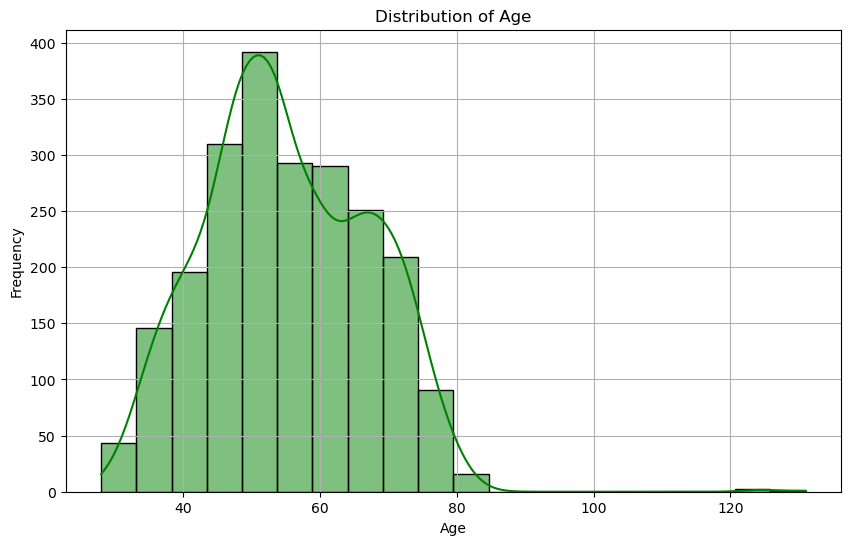

In [80]:
# Histogram with age
current_year = 2024  
data['age'] = current_year - data['birth_year']
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True, color='green', line_kws={'color': '#276ab3'})  
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The most frequently occuring age in this dataset is 

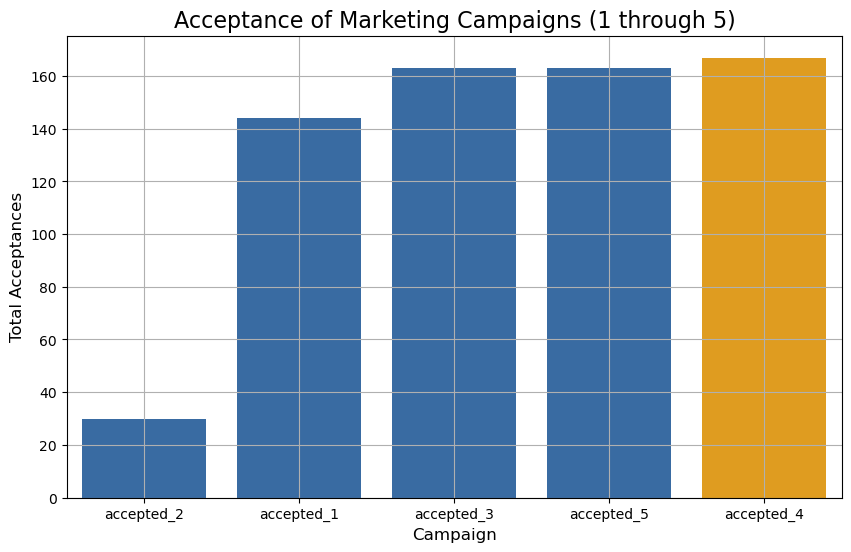

In [58]:
# Bar graph of acceptance counts by campagin
accepted_columns = ['accepted_1', 'accepted_2', 'accepted_3', 'accepted_4', 'accepted_5']
acceptance_counts = data[accepted_columns].sum().sort_values()
colors = ['orange' if index == 'accepted_4' else '#276ab3' for index in acceptance_counts.index]
plt.figure(figsize=(10, 6))
sns.barplot(x=acceptance_counts.index, y=acceptance_counts.values, palette=colors)
plt.title('Acceptance of Marketing Campaigns (1 through 5)', fontsize=16)
plt.xlabel('Campaign', fontsize=12)
plt.ylabel('Total Acceptances', fontsize=12)
plt.grid(True)
plt.show()

In [25]:
# Number of people who accepted the 4th campaign
accepted_columns = ['accepted_1', 'accepted_2', 'accepted_3', 'accepted_4', 'accepted_5']
acceptance_counts = data[accepted_columns].sum().sort_values()
num_accepted_4 = data['accepted_4'].sum()
print(f'Number of people who accepted the 4th campaign: {num_accepted_4}')

Number of people who accepted the 4th campaign: 167


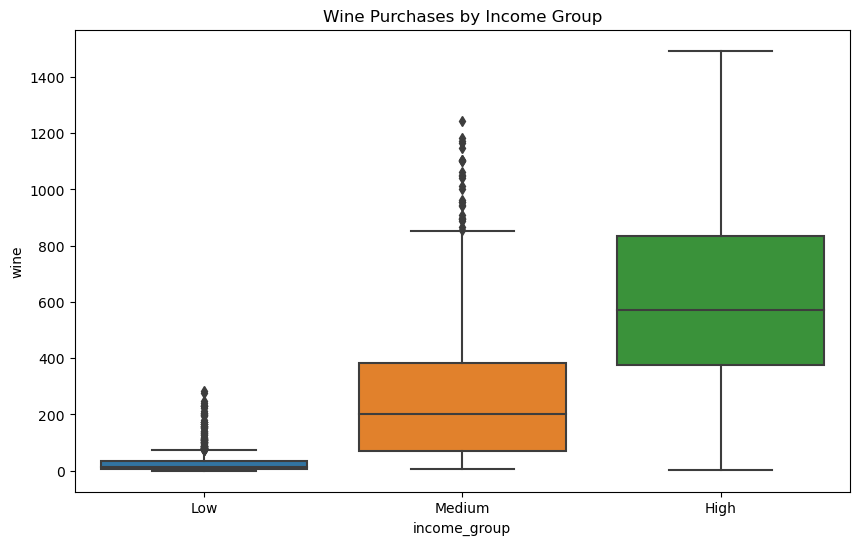

In [30]:
# Box plot of income and creation of income_group varaible based on quantiles
data['income_group'] = pd.qcut(data['income'], q=3, labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='income_group', y='wine', data=data)
plt.title('Wine Purchases by Income Group')
plt.show()


Most of the customers fall within the high income group for wine purchases

Customers within the high income group accepted more campaigns.

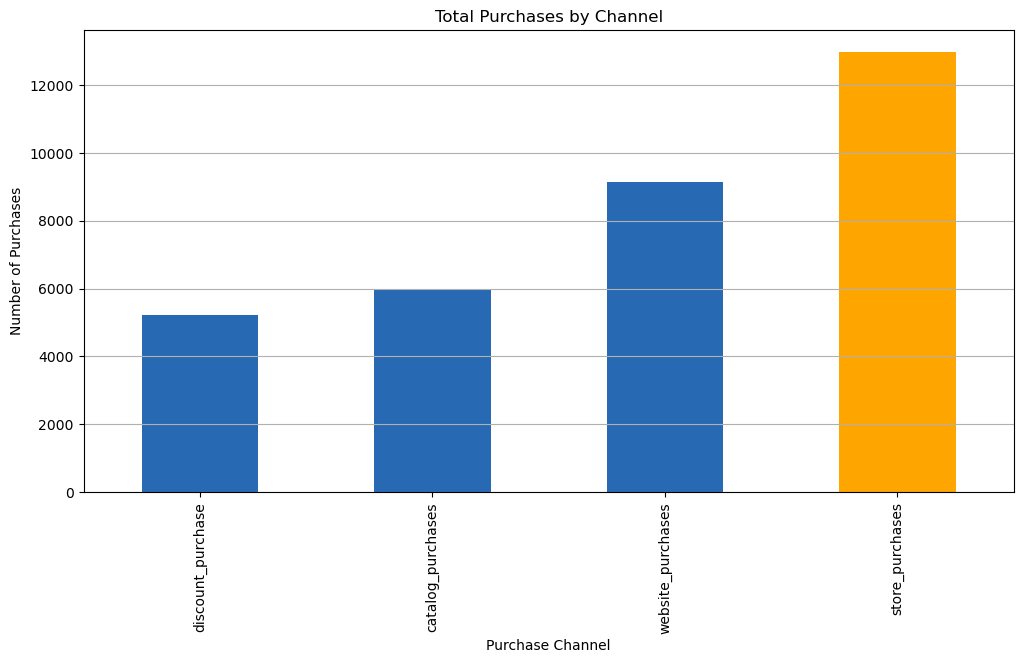

In [62]:
# Total purchases by channel
plt.figure(figsize=(12, 6))
purchase_channels = ['discount_purchase', 'website_purchases', 'catalog_purchases', 'store_purchases']
total_purchases = data[purchase_channels].sum().sort_values()
colors = ['orange' if index == 'store_purchases' else '#276ab3' for index in total_purchases.index]
total_purchases.plot(kind='bar', color=colors)
plt.title('Total Purchases by Channel')
plt.ylabel('Number of Purchases')
plt.xlabel('Purchase Channel')
plt.grid(axis='y')
plt.show()

In [24]:
# Total purchases for each channel (numeric values)
total_website_purchases = data['website_purchases'].sum()
total_catalog_purchases = data['catalog_purchases'].sum()
total_discount_purchases = data['discount_purchase'].sum()
total_store_purchases = data['store_purchases'].sum()
print(f'Total website purchases: {total_website_purchases}')
print(f'Total catalog purchases: {total_catalog_purchases}')
print(f'Total discount purchases: {total_discount_purchases}')
print(f'Total in-store purchases: {total_store_purchases}')


Total website purchases: 9150
Total catalog purchases: 5963
Total discount purchases: 5208
Total in-store purchases: 12970


The in store channel had the highest number of purchases.

In [36]:
# Finding the best regression model using accepted_4 as a dependent variable
# Define dependent variable
y = data['accepted_4']  

# Function to build the model
def build_model(X, y):
    X = sm.add_constant(X)  
    model = sm.OLS(y, X)    
    results = model.fit()   
    return results.rsquared_adj, list(X.columns[1:]) 

# List of independent variables to consider
variables = ['wine', 'fruits','meat','fish', 'sweet', 'gold', 
             'discount_purchase', 'website_purchases', 'catalog_purchases', 
         'website_visits', 'accepted_1', 'accepted_2', 
             'accepted_3', 'accepted_4', 'accepted_5', 'complain', 'response']

# Check if all variables exist in the data
for var in variables:
    if var not in data.columns:
        print(f"Warning: '{var}' is not in the DataFrame columns.")

# Step 1: Evaluate single variables
best_adj_r2 = -1  
best_model_vars = []

for var in variables:
    if var in data.columns:  
        X = data[[var]]  
        adjusted_r2, model_vars = build_model(X, y)
        print(f"Model with {var}: Adjusted R-squared = {adjusted_r2:.4f}")
        
        # Track the best model
        if adjusted_r2 > best_adj_r2:
            best_adj_r2 = adjusted_r2
            best_model_vars = model_vars

# Step 2: Incrementally add variables
initial_vars = [best_model_vars[0]]  
X = data[initial_vars]
adjusted_r2, model_vars = build_model(X, y)
print(f"\nInitial Model with {initial_vars}: Adjusted R-squared = {adjusted_r2:.4f}")

best_full_model_vars = initial_vars.copy()  
best_full_adj_r2 = adjusted_r2

# Iterate over remaining variables
for var in variables:
    if var not in best_full_model_vars and var in data.columns: 
        X = data[best_full_model_vars + [var]] 
        adjusted_r2, model_vars = build_model(X, y)
        print(f"\nModel with {', '.join(best_full_model_vars + [var])}: Adjusted R-squared = {adjusted_r2:.4f}")
        
        # Check for the best model
        if adjusted_r2 > best_full_adj_r2:
            best_full_adj_r2 = adjusted_r2
            best_full_model_vars.append(var)

# Final results
print(f"\nBest Model Variables: {best_full_model_vars}")
print(f"Best Model Adjusted R-squared: {best_full_adj_r2:.4f}")

Model with wine: Adjusted R-squared = 0.1390
Model with fruits: Adjusted R-squared = -0.0003
Model with meat: Adjusted R-squared = 0.0101
Model with fish: Adjusted R-squared = -0.0002
Model with gold: Adjusted R-squared = 0.0000
Model with discount_purchase: Adjusted R-squared = -0.0002
Model with website_purchases: Adjusted R-squared = 0.0239
Model with catalog_purchases: Adjusted R-squared = 0.0190
Model with website_visits: Adjusted R-squared = 0.0006
Model with accepted_1: Adjusted R-squared = 0.0627
Model with accepted_2: Adjusted R-squared = 0.0850
Model with accepted_3: Adjusted R-squared = 0.0059
Model with accepted_4: Adjusted R-squared = 1.0000
Model with accepted_5: Adjusted R-squared = 0.0936
Model with complain: Adjusted R-squared = 0.0003
Model with response: Adjusted R-squared = 0.0309

Initial Model with ['accepted_4']: Adjusted R-squared = 1.0000

Model with accepted_4, wine: Adjusted R-squared = 1.0000

Model with accepted_4, fruits: Adjusted R-squared = 1.0000

Model

In [34]:
# Finding the best regression model using accepted_5 as a dependent variable
# Define dependent variable 
y = data['accepted_5']  # Adjust based on your dependent variable

# Function to build the model
def build_model(X, y):
    X = sm.add_constant(X)  
    model = sm.OLS(y, X)    
    results = model.fit()    
    return results.rsquared_adj, list(X.columns[1:])  

# List of independent variables to consider
variables = ['wine', 'fruits','meat','fish', 'sweet', 'gold', 
             'discount_purchase', 'website_purchases', 'catalog_purchases', 
         'website_visits', 'accepted_1', 'accepted_2', 
             'accepted_3', 'accepted_4', 'accepted_5', 'complain', 'response', 'kid_home','teen_home']

# Check if all variables exist in the data
for var in variables:
    if var not in data.columns:
        print(f"Warning: '{var}' is not in the DataFrame columns.")

# Step 1: Evaluate single variables
best_adj_r2 = -1  
best_model_vars = []

for var in variables:
    if var in data.columns:  
        X = data[[var]] 
        adjusted_r2, model_vars = build_model(X, y)
        print(f"Model with {var}: Adjusted R-squared = {adjusted_r2:.4f}")
        
        # Track the best model
        if adjusted_r2 > best_adj_r2:
            best_adj_r2 = adjusted_r2
            best_model_vars = model_vars

# Step 2: Incrementally add variables
initial_vars = [best_model_vars[0]] 
X = data[initial_vars]
adjusted_r2, model_vars = build_model(X, y)
print(f"\nInitial Model with {initial_vars}: Adjusted R-squared = {adjusted_r2:.4f}")

best_full_model_vars = initial_vars.copy() 
best_full_adj_r2 = adjusted_r2

# Iterate over remaining variables
for var in variables:
    if var not in best_full_model_vars and var in data.columns:  
        X = data[best_full_model_vars + [var]]  
        adjusted_r2, model_vars = build_model(X, y)
        print(f"\nModel with {', '.join(best_full_model_vars + [var])}: Adjusted R-squared = {adjusted_r2:.4f}")
        
        # Check for the best model
        if adjusted_r2 > best_full_adj_r2:
            best_full_adj_r2 = adjusted_r2
            best_full_model_vars.append(var)

# Final results
print(f"\nBest Model Variables: {best_full_model_vars}")
print(f"Best Model Adjusted R-squared: {best_full_adj_r2:.4f}")

Model with wine: Adjusted R-squared = 0.2230
Model with fruits: Adjusted R-squared = 0.0462
Model with meat: Adjusted R-squared = 0.1393
Model with fish: Adjusted R-squared = 0.0394
Model with gold: Adjusted R-squared = 0.0323
Model with discount_purchase: Adjusted R-squared = 0.0331
Model with website_purchases: Adjusted R-squared = 0.0188
Model with catalog_purchases: Adjusted R-squared = 0.1035
Model with website_visits: Adjusted R-squared = 0.0769
Model with accepted_1: Adjusted R-squared = 0.1621
Model with accepted_2: Adjusted R-squared = 0.0487
Model with accepted_3: Adjusted R-squared = 0.0060
Model with accepted_4: Adjusted R-squared = 0.0936
Model with accepted_5: Adjusted R-squared = 1.0000
Model with complain: Adjusted R-squared = -0.0004
Model with response: Adjusted R-squared = 0.1063
Model with kid_home: Adjusted R-squared = 0.0419
Model with teen_home: Adjusted R-squared = 0.0361

Initial Model with ['accepted_5']: Adjusted R-squared = 1.0000

Model with accepted_5, win

In [106]:
# Regression with wine and meat predicting accepted_5 
X = data[['wine', 'meat']]  
y = data['accepted_5']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             accepted_5   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     354.0
Date:                Mon, 21 Oct 2024   Prob (F-statistic):          2.79e-134
Time:                        11:35:50   Log-Likelihood:                 149.07
No. Observations:                2240   AIC:                            -292.1
Df Residuals:                    2237   BIC:                            -275.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0476      0.007     -7.226      0.0

In [115]:
# Regression predicting catalog_purchases
X = data[['fruits', 'meat', 'wine', 'income','kid_home']]  # Include multiple predictors
y = data['catalog_purchases']
if X.isnull().any().any() or y.isnull().any():
    print("Missing values found. Dropping rows with missing values.")
    data = data.dropna(subset=['fruits', 'meat', 'wine', 'income', 'kid_home', 'catalog_purchases'])
    X = data[['fruits', 'meat', 'wine', 'income', 'kid_home']]
    y = data['catalog_purchases']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      catalog_purchases   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     765.2
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:43:00   Log-Likelihood:                -4410.4
No. Observations:                2216   AIC:                             8833.
Df Residuals:                    2210   BIC:                             8867.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5591      0.113      4.927      0.0

In [121]:
# Regression predicting accepted_5
X = data[['fruits', 'meat', 'wine', 'income','kid_home']]  # Include multiple predictors
y = data['accepted_5']
if X.isnull().any().any() or y.isnull().any():
    print("Missing values found. Dropping rows with missing values.")
    data = data.dropna(subset=['fruits', 'meat', 'wine', 'income', 'kid_home', 'catalog_purchases'])
    X = data[['fruits', 'meat', 'wine', 'income', 'kid_home']]
    y = data['catalog_purchases']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             accepted_5   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     145.3
Date:                Mon, 21 Oct 2024   Prob (F-statistic):          1.37e-133
Time:                        11:43:55   Log-Likelihood:                 153.04
No. Observations:                2216   AIC:                            -294.1
Df Residuals:                    2210   BIC:                            -259.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0939      0.014     -6.488      0.0

In [123]:
# Final regression for meat and catalog
X = data[['catalog_purchases']]
y = data['wine']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wine   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     1494.
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          3.17e-250
Time:                        17:15:23   Log-Likelihood:                -15472.
No. Observations:                2216   AIC:                         3.095e+04
Df Residuals:                    2214   BIC:                         3.096e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               109.6791      7.49

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


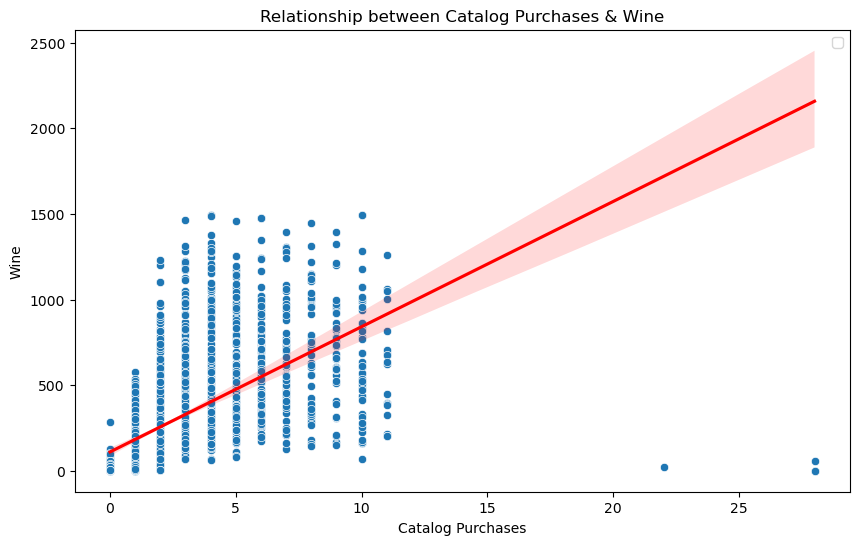

In [128]:
# Regression plot for wine and catalog
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='catalog_purchases',                 
    y='wine',    
    data=data,                                                 
    markers=True                 
)
sns.regplot(
    x='catalog_purchases', 
    y='wine', 
    data=data, 
    scatter=False,              
    color='red',               
    line_kws={"label": "Regression Line"}  
)

plt.title("Relationship between Catalog Purchases & Wine")
plt.xlabel("Catalog Purchases")
plt.ylabel("Wine")
plt.legend()  
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


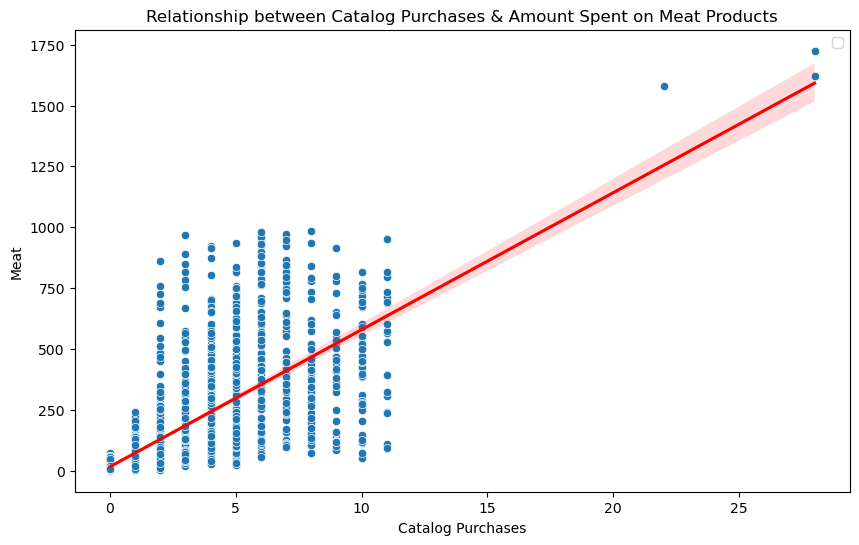

In [129]:
# Regression plot for Catalog Purchases & Meat
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='catalog_purchases',                 
    y='meat',    
    data=data,                                                 
    markers=True                 
)
sns.regplot(
    x='catalog_purchases', 
    y='meat', 
    data=data, 
    scatter=False,              
    color='red',               
    line_kws={"label": "Regression Line"}  
)

plt.title("Relationship between Catalog Purchases & Amount Spent on Meat Products")
plt.xlabel("Catalog Purchases")
plt.ylabel("Meat")
plt.legend()  
plt.show()

In [57]:
# Map marital_status to numeric values
data['marital_status_numeric'] = data['marital_status'].map({
    'Single': 1,
    'Married': 2,
    'Divorced': 3,
    'Widowed': 4
})


In [67]:
# Map education to numeric values
data['education_numeric'] = data['education'].map({
    'Graduation': 1,
    'PhD': 2,
    'Basic': 3,
    'Master': 4,
    '2n Cycle': 5  # Changed to 4 to avoid duplicate with Master
})


In [75]:
# Regression for accepted_5 using categorical variables
X = data[['teen_home','kid_home']]  # Include the new numeric column
y = data['accepted_5']
print("Missing values in X:")
print(X.isnull().sum())
print("Missing values in y:")
print(y.isnull().sum())
print("Infinite values in X:")
print((X == float('inf')).sum())
print("Infinite values in X:")
print((X == float('-inf')).sum())
X = X.dropna()
y = y[X.index] 
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


Missing values in X:
teen_home    0
kid_home     0
dtype: int64
Missing values in y:
0
Infinite values in X:
teen_home    0
kid_home     0
dtype: int64
Infinite values in X:
teen_home    0
kid_home     0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:             accepted_5   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     99.55
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           3.82e-42
Time:                        11:18:21   Log-Likelihood:                -63.369
No. Observations:                2240   AIC:                             132.7
Df Residuals:                    2237   BIC:                             149.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                   